## Import Relevant data manipulation Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import other useful libraries
import re
from datetime import datetime

## Read Data

In [ ]:
# Connect with google drive ( Since working within colab)
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/'Colab Notebooks'/upgrad_MS/upgrad_case_study/LendingClub_CaseStudy/

In [ ]:
# Read loan.csv into dataframe
df_loan = pd.read_csv("loan.csv", sep=",")
df_loan.info()

## Data Understanding

In [8]:
# Check sample of the df
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
# Check column of the df
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [10]:
# Check shape of the df
df_loan.shape

(39717, 111)

As per the given dataset:

  1. Important columns in the dataset: loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.
  2. Here the ***target variable***, is loan_status, i.e to be compared across all the independent variables.
  3. Analyse data by comparing the mean default_rate across various independent variables . Thus, depicting most affecting variables
.



# Data Cleaning

Cross- validate dataset for missing values, and other data complications.

### Missing data Validation and Treatment

In [11]:
# Check missing data percentage in each column
round(df_loan.isnull().sum()/len(df_loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

- As per the above figures, the dataset have many columns have 100%, 90% missing values. 
- We can filter data on the basis of these missing values. By completely removing these columns.

In [12]:
# Filter columns having less than 90% missing values
df_loan = df_loan[df_loan.columns[((df_loan.isnull().sum()/len(df_loan.index))*100) < 90]]

In [13]:
# Check columns, shape of updated data
df_loan.columns, df_loan.shape

(Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
        'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
        'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'policy_code', 'application_type',
        'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
        'pub_rec_bankruptcies', 'tax_liens'],
       dtype='object'), (3

In [14]:
# cross-check missing data percentage to re-varify
round(df_loan.isnull().sum()/len(df_loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

- Here, the highest missing-values are in column *desc* and *mths_since_last_delinq* with 33% and 65% missing values.
- These columns are :  
 - description 
 - months since last delinquent

In [15]:
# Check data in column
df_loan.loc[:, ['desc', 'mths_since_last_delinq']].head(8)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
5,NaN,NaN
6,Borrower added on 12/18/11 > I am planning o...,NaN
7,Borrower added on 12/16/11 > Downpayment for...,NaN


 As per the description provided, 
 - Column *desc* have customer's comments while applying for loan. Though, information such as such as sentiment, number of positive/negative words can be derived, but as per current scope of the Case-study, this column can be filtered out.  

- Column *mths_since_last_delinq* represents The number of months since the borrower's last delinquency. Since this information is added months later, thus it is not important while approving loan. Thus considering scope of the case study, this column can also be filtered safely.

In [16]:
# Drop 'desc', 'mths_since_last_delinq'
df_loan = df_loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [17]:
# cross-check missing data percentage to re-varify
round(df_loan.isnull().sum()/len(df_loan.index), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

Thus, our data looks highly populated after missing- data treatment.

In [18]:
# For data-sanity, check if rows have greater than 5 missing values
len(df_loan[df_loan.isnull().sum(axis=1) > 5].index)

0

### Validate Data-format of **columns**

In [19]:
# Check data-format of columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# Update int_rate column from character to float and remove '%' character
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [21]:
# Check data-values
df_loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [22]:
# Cross- validate data-types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [23]:
# Also, check and update emp_length column from character to float and remove special character
df_loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [24]:
# Performing missing value-treatment for 'emp_length' column
df_loan = df_loan[~df_loan['emp_length'].isnull()]

In [25]:
# Update emp_length column from character to float and remove special character
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [26]:
# Check updated data
df_loan['emp_length'].head(4)

0    10
1     1
2    10
3    10
Name: emp_length, dtype: object

In [27]:
#  Cross- validate data-types
df_loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [28]:
# Convert column emp_length to numeric
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [29]:
#  Cross- validate data-types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

# Data Analysis

- As per the main objective of the case study, it is crucial to understand and detect the predictors for *default*, in a way that such variables can be utilised for approval/rejection of loan. 
- Here, we have broadly three types of variables - 
 1. Demographic variables such as age, occupation etc
 2. Loan characteristics such as loan amount, interest rate, purpose of loan etc.
 3. Customer behaviour variables such as delinquent 2 years, revolving balance, next payment date etc. As per nature of variables, these are generated after the loan is dispersed.

- Here, since customer behaviour variables are not present at the loan application/ approval time, therefore these cannot be ustilised as credit-approval predictors.

- Hence, utilising Demographic variables and Loan characteristics variables.



## Feature Selection

In [30]:
# Initiate data anlysis dataframe, to keep the orginal intact
df_analysis = df_loan.copy()

In [31]:
# List all behaviour variables
behaviour_variable =  [ "delinq_2yrs", "earliest_cr_line","inq_last_6mths", "open_acc","pub_rec","revol_bal","revol_util", "total_acc","out_prncp", "out_prncp_inv","total_pymnt",
  "total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee", "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d",
  "application_type"]

In [32]:
# Dropping the columns with the behaviour variables
df_analysis = df_analysis.drop(behaviour_variable, axis=1)
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [33]:
# Also, as per data analysis scope, 'title', 'url', 'zip_code', 'addr_state' could not be utilised
df_analysis = df_analysis.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

For analysis with respect to target variable i.e. *loan_status*, converting data to binary, mentioning Fully Paid = 1, else = 0.


In [34]:
# Cross-checking target variable
df_analysis['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [35]:
# Here 'current' are neither fully paid not defaulted, thus dropping these. Also, it it still in running mode.
df_analysis = df_analysis[df_analysis['loan_status'].isin(['Fully Paid','Charged Off'])]

In [36]:
# Cross-checking loan_status variable
df_analysis['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [37]:
# Convert data to binary, mentioning Fully Paid = 0, else = 1.
df_analysis['loan_status'] = df_analysis['loan_status'].map({'Fully Paid':0,'Charged Off':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# Change type of loan_status
df_analysis['loan_status'] = df_analysis['loan_status'].apply(lambda x: pd.to_numeric(x))

In [39]:
# Cross-checking loan_status variable
df_analysis['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64


## Univariate Analysis

### Defaulter within Categorical variables




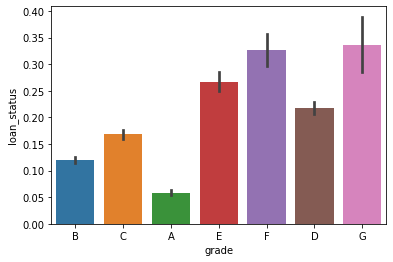

In [40]:
# Analyse/Visualise data across grade
sns.barplot(x='grade', y='loan_status', data = df_analysis)
plt.show()

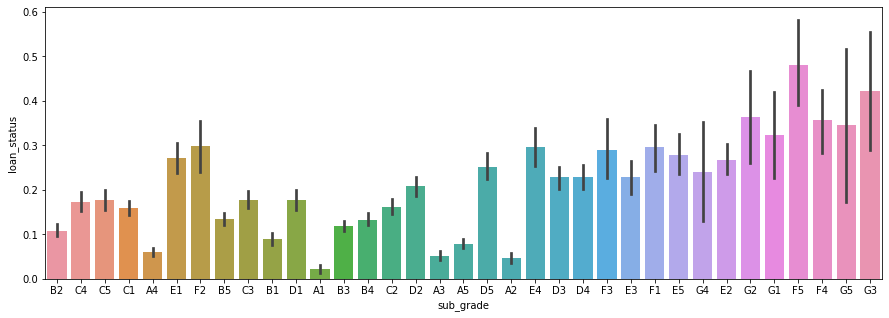

In [41]:
# Analyse/Visualise data across sub_grade
plt.figure(figsize=(15, 5))
sns.barplot(x='sub_grade', y='loan_status', data = df_analysis)
plt.show()

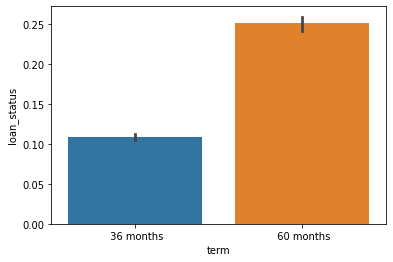

In [42]:
# Analyse/Visualise data across term
sns.barplot(x='term', y='loan_status', data = df_analysis)
plt.show()

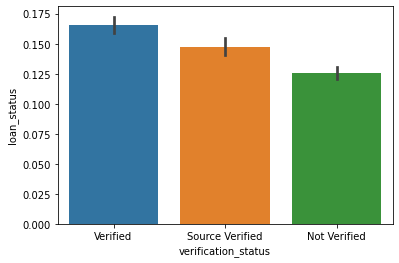

In [43]:
# Analyse/Visualise data across verification_status
sns.barplot(x='verification_status', y='loan_status', data = df_analysis)
plt.show()

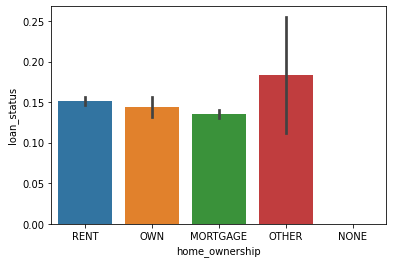

In [44]:
# Analyse/Visualise data across home ownership(home_ownership does not have much difference)
sns.barplot(x='home_ownership', y='loan_status', data = df_analysis)
plt.show()

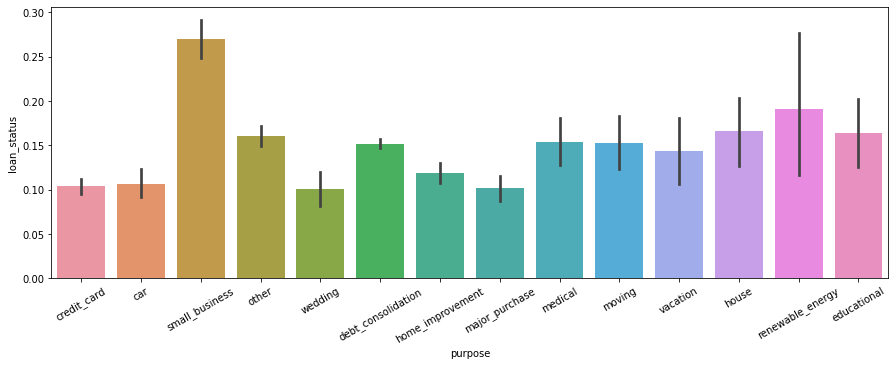

In [45]:
# Analyse/Visualise data across purpose
plt.figure(figsize=(15, 5))
sns.barplot(x='purpose', y='loan_status', data = df_analysis)
plt.xticks(rotation=30)
plt.show()

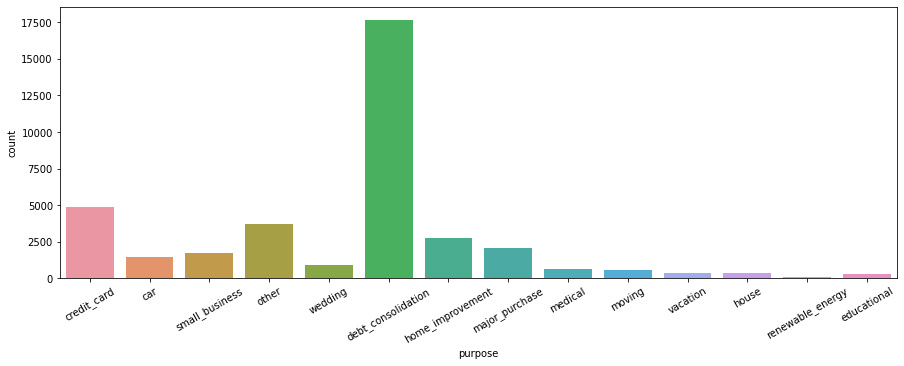

In [46]:
# Analyse number of loans in each purpose
plt.figure(figsize=(15, 5))
sns.countplot(x='purpose', data=df_analysis)
plt.xticks(rotation=30)
plt.show()

### Derived Metrices

In [47]:
#  Also, Analyse/Visualise data across years.
df_analysis['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [48]:
# Get year data from issue_d
df_analysis['issue_d'] = df_analysis['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [49]:
# Get month and year information from issue_d
df_analysis['month'] = df_analysis['issue_d'].apply(lambda x: x.month)
df_analysis['year'] = df_analysis['issue_d'].apply(lambda x: x.year)

In [50]:
# Check loans granted across years. Number of loans is increasing greatly across years.
pd.DataFrame(df_analysis.groupby('year').year.count())

,year
year,
2007,251
2008,1562
2009,4716
2010,11214
2011,19801


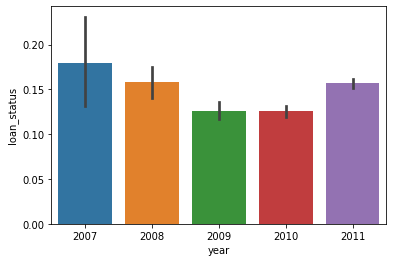

In [51]:
# Analyse/Visualise data across years.
sns.barplot(x='year', y='loan_status', data = df_analysis)
plt.show()

In [52]:
# Check loans granted across months. Mostly, loans dispersed in 3rd and 4th quarter
pd.DataFrame(df_analysis.groupby('month').month.count())

,month
month,
1,2331
2,2278
3,2632
4,2756
5,2838
6,3094
7,3253
8,3321
9,3394


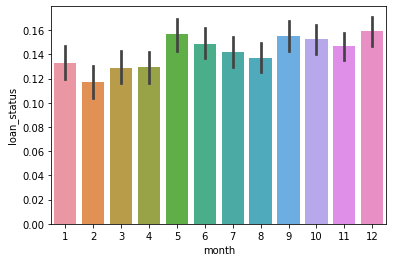

In [53]:
# Analyse/Visualise data across years.
sns.barplot(x='month', y='loan_status', data = df_analysis)
plt.show()

### Defaulter within Continuous variables

In [54]:
df_analysis.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'month', 'year'],
      dtype='object')

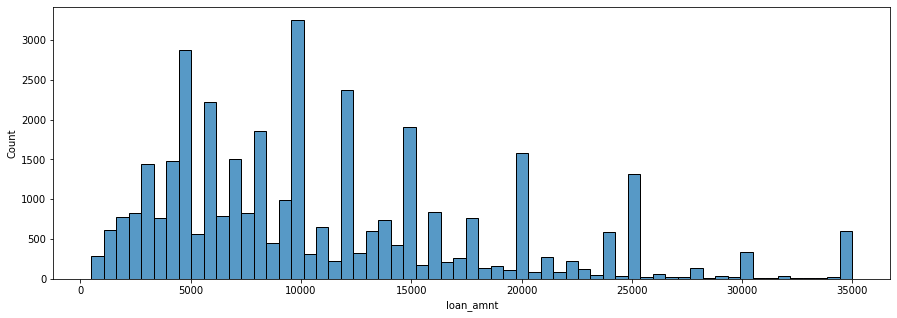

In [55]:
# Analyse/Visualise data across loan amount: the maximum loan range amount is between 5000-10000
plt.figure(figsize=(15,5))
sns.histplot(df_analysis['loan_amnt'])
plt.show()

- Binning Continuous variables to analyse defaut-rates
- Bins used :  small, medium, high, very high.

In [56]:
# binning loan amount
df_analysis['loan_amnt']= pd.cut(df_analysis['loan_amnt'], [0, 10000, 20000, 30000, 1000000], labels=['low', 'medium', 'intermediate', 'high'])
df_analysis['loan_amnt'].value_counts()

low             21504
medium          11830
intermediate     3490
high              720
Name: loan_amnt, dtype: int64

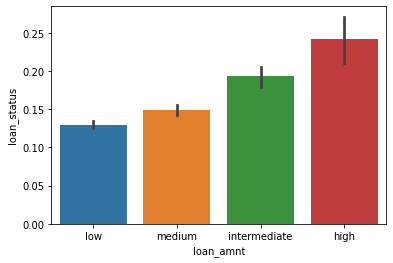

In [57]:
# Analyse/ Visualise binned loan amount : higher loan amount -> higher deafult rate
sns.barplot(x='loan_amnt', y='loan_status', data= df_analysis)
plt.show()

In [58]:
# Binning funded_amnt_inv as per loan amount binning logic
df_analysis['funded_amnt_inv']= pd.cut(df_analysis['funded_amnt_inv'], [0, 10000, 20000, 30000, 1000000], labels=['low', 'medium', 'intermediate', 'high'])

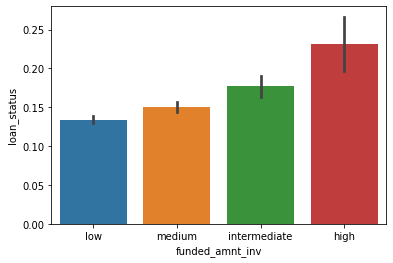

In [59]:
# Analyse/ Visualise binned funded_amnt_inv : similar behavious as loan amount
sns.barplot(x='funded_amnt_inv', y='loan_status', data= df_analysis)
plt.show()

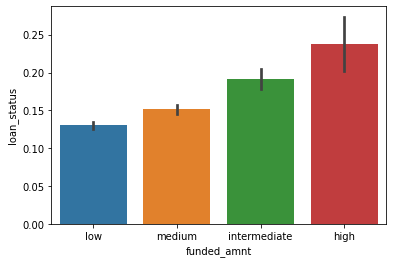

In [60]:
# Analyse/ Visualise binned funded_amnt
df_analysis['funded_amnt']= pd.cut(df_analysis['funded_amnt'], [0, 10000, 20000, 30000, 1000000], labels=['low', 'medium', 'intermediate', 'high'])
sns.barplot(x='funded_amnt', y='loan_status', data= df_analysis)
plt.show()

In [61]:
df_analysis.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'month', 'year'],
      dtype='object')

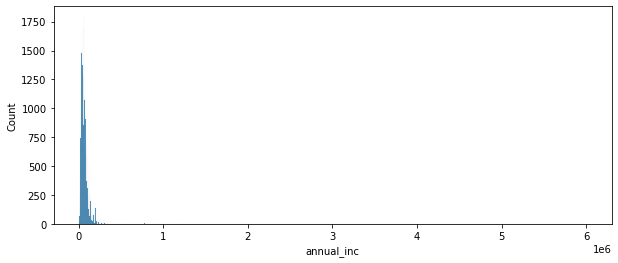

In [62]:
# Analyse/Visualise data across annual_inc
plt.figure(figsize=(10,4))
sns.histplot(df_analysis['annual_inc'])
plt.show()

In [63]:
# Bin annual income data
df_analysis['annual_inc']= pd.cut(df_analysis['annual_inc'], [0, 100000, 500000, 2000000, 10000000000], labels=['low', 'medium', 'intermediate', 'high'])
df_analysis['annual_inc'].value_counts()

low             32111
medium           5368
intermediate       62
high                3
Name: annual_inc, dtype: int64

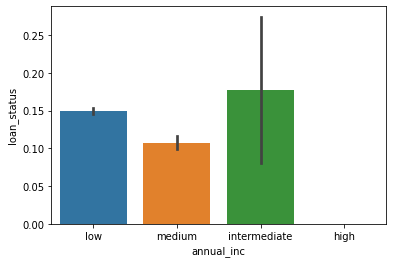

In [64]:
# Visualise annual income
sns.barplot(x='annual_inc', y='loan_status', data= df_analysis)
plt.show()

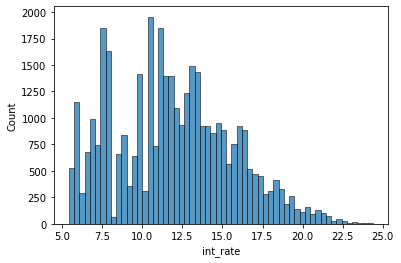

In [65]:
# Analyse/Visualise data across interest rate
sns.histplot(df_analysis['int_rate'])
plt.show()

In [66]:
# Binning Interest rate
df_analysis['int_rate']= pd.cut(df_analysis['int_rate'], [0, 10, 15, 100], labels=['low', 'medium', 'high'])
df_analysis['int_rate'].value_counts()

medium    17880
low       11834
high       7830
Name: int_rate, dtype: int64

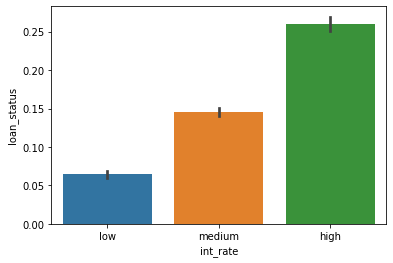

In [67]:
# Analyse/ Visualise binned int_rate : similar behavious as loan amount
sns.barplot(x='int_rate', y='loan_status', data= df_analysis)
plt.show()

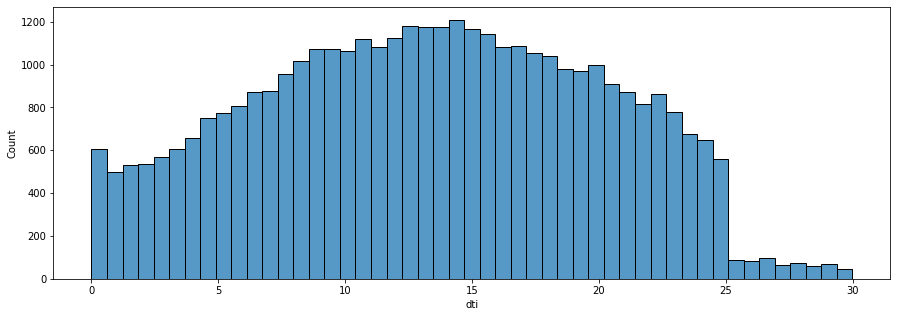

In [68]:
# Analyse/Visualise data across dti(debt to income ratio)
plt.figure(figsize=(15, 5))
sns.histplot(df_analysis['dti'])
plt.show()

In [69]:
# Binning as per interest rate logic
df_analysis['dti'] = pd.cut(df_analysis['dti'], [0, 10, 15, 100], labels=['low', 'medium', 'high'])

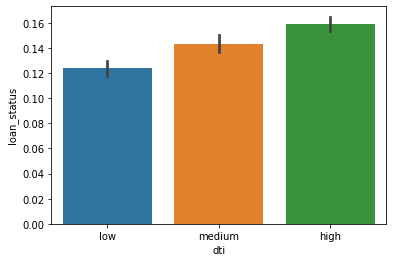

In [70]:
# Analyse/ Visualise binned dti
sns.barplot(x='dti', y='loan_status', data= df_analysis)
plt.show()

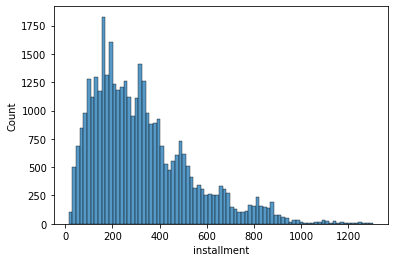

In [71]:
# Analyse/Visualise data across dti(debt to income ratio)
sns.histplot(df_analysis['installment'])
plt.show()

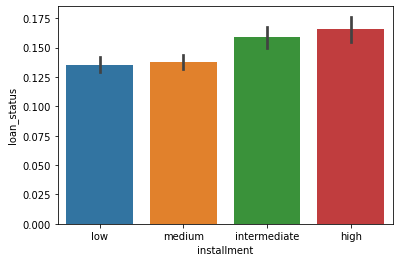

In [72]:
# Binning installment
# Bin installment and visualise data
df_analysis['installment'] = pd.cut(df_analysis['installment'], [0, 200, 400, 600, 1500 ], labels=['low', 'medium', 'intermediate','high'])

sns.barplot(x='installment', y='loan_status', data= df_analysis)
plt.show()

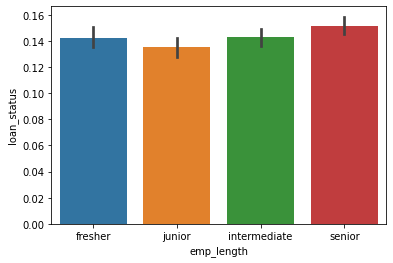

In [73]:
# Checkout emp_length
df_analysis['emp_length'] = pd.cut(df_analysis['emp_length'], [0, 1, 3, 7, 100], labels=['fresher', 'junior','intermediate', 'senior'])

sns.barplot(x='emp_length', y='loan_status', data= df_analysis)
plt.show()

In [74]:
df_analysis.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'month', 'year'],
      dtype='object')

- Understandabily, as the grade,and sub-grade of loan goes from A to G, the default-rate increases. This is due to the fact that, grade is decided by Lending Club based on the risk of the loan. 
- Surprisingly, verified loans default more than not verified.
- Small business loans defualt the most, then renewable energy and education.
- *'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'dti'* have positive effect on default-rate. Default-rate increases as per these variables increase.


# Segmented Univariate Analysis


Analysing purpose of the loan, since it effects- applicant-type, interest-rate, income, and thus the default-rate. 

In [75]:
df_analysis['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [76]:
# Analyse the top 4 types of loans as per purpose -> consolidation, credit card, home improvement and major purchase. Filtering the data
df_analysis = df_analysis[df_analysis['purpose'].isin([ "debt_consolidation", "credit_card", "home_improvement", "major_purchase"])]
df_analysis['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

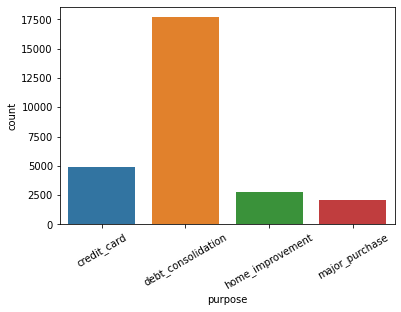

In [77]:
# Visualise number of loans as per purpose 
sns.countplot(x = df_analysis['purpose'])
plt.xticks(rotation=30)
plt.show()

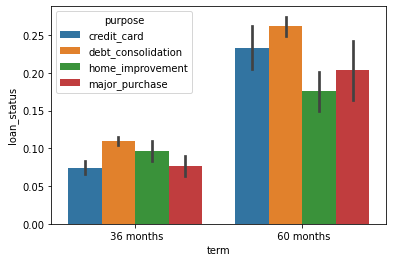

In [78]:
# Analyse categorical variable wrt default and purpose of loan
sns.barplot(x='term', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

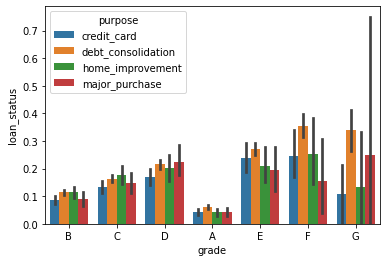

In [79]:
# Analyse categorical variable wrt default and purpose of loan
sns.barplot(x='grade', y="loan_status", hue='purpose', data = df_analysis)
plt.show()

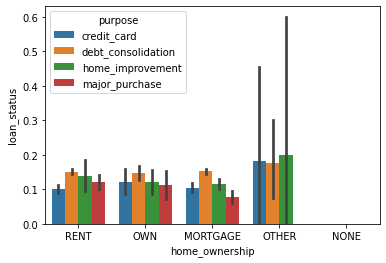

In [80]:
# Analyse categorical variable:home ownership wrt default and purpose of loan
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

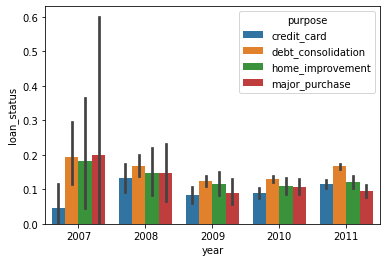

In [81]:
# Analyse categorical variable:year wrt default and purpose of loan
sns.barplot(x='year', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

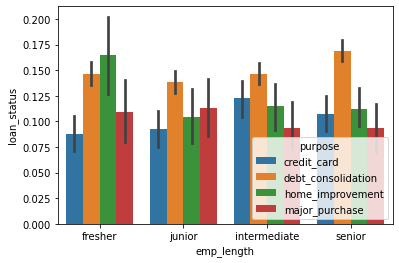

In [82]:
# Analyse categorical variable:emp_length wrt default and purpose of loan
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

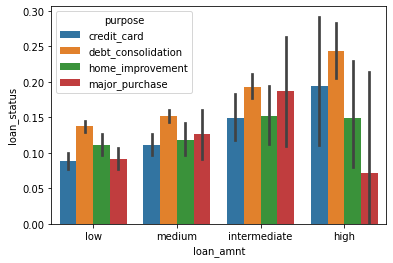

In [83]:
# Analyse categorical variable:loan_amnt wrt default and purpose of loan
sns.barplot(x='loan_amnt', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

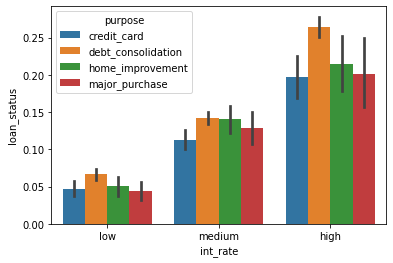

In [84]:
# Analyse categorical variable:int_rate wrt default and purpose of loan
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

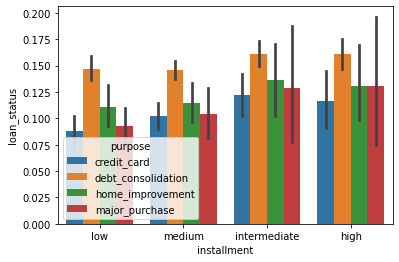

In [85]:
# Analyse categorical variable:installment wrt default and purpose of loan
sns.barplot(x='installment', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

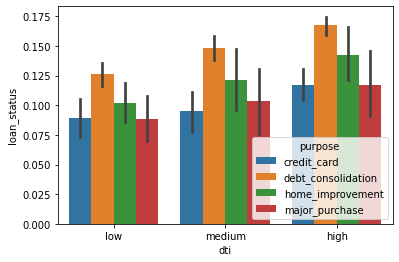

In [86]:
# Analyse categorical variable:dti wrt default and purpose of loan
sns.barplot(x='dti', y="loan_status", hue='purpose', data=df_analysis)
plt.show()

- Generally, debt_consolidation loans does have very high default rates across all categories
- The credit card loans are less defaulter amonst almost all the four purpose of loan, when comparing between different categories



Checking the default rate difference across annual income and loan amount

In [87]:
# Check average Default Rate
round(np.mean(df_analysis['loan_status']), 2)

0.14

Thus, the average Default Rate is approximately 14%.

In [88]:
# variation of default rate across annual_inc
round(df_analysis.groupby('annual_inc').loan_status.mean().sort_values(ascending=False), 2)

annual_inc
intermediate    0.17
low             0.14
medium          0.10
high            0.00
Name: loan_status, dtype: float64

In [89]:
round(df_analysis.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False), 2)

loan_amnt
high            0.22
intermediate    0.18
medium          0.14
low             0.12
Name: loan_status, dtype: float64

# CONCLUSION

- There is a lot of missing data within the dataset, approximately 50% of the columns have more than 90% missing data.

- Maximum number of loans are taken for the purpose of debt_consolidation. Also, this category contain the most defaulters.

- There are more percentage of default-rate in long-term rate, that is, 36 months.

- Small business loans defualt the most, then renewable energy and education.

- It is important to analyse grade and sub-grade, since the grades have positive effect on defaulters.